# **Introduction**

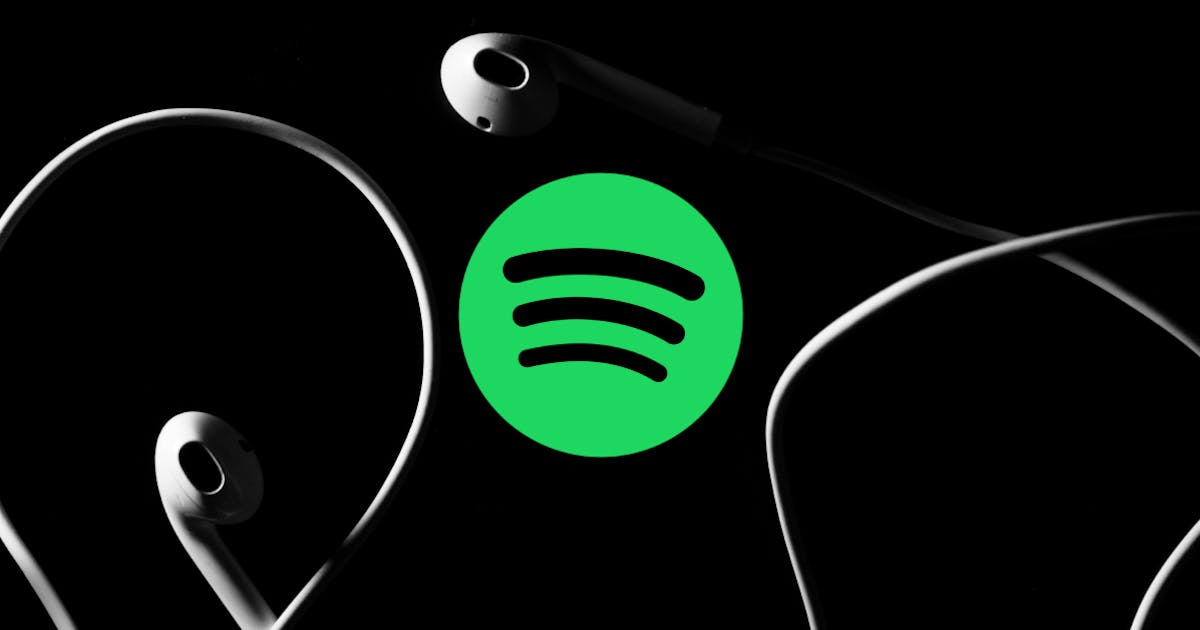

Spotify is a digital music streaming platform launched in 2008 in Sweden. Created to offer a legal alternative to music piracy, it quickly became one of the most popular services worldwide. Today, Spotify has hundreds of millions of users and offers a vast catalog of songs, podcasts, and playlists.

This project analyzes the characteristics of top songs on Spotify from 2000 to 2019, exploring trends and identifying what makes a song popular based on audio features.

# **Importing Libraries and Loading Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
spotify = pd.read_csv('songs_normalize.csv', sep = ',')
spotify.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


# **Basic Data Exploration**

**Variables**

* artist: Name of the Artist.

* song: Name of the Track.

* duration_ms: Duration of the track in milliseconds.

* explicit: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.

* year: Release Year of the track.

* popularity: The higher the value the more popular the song is.

* danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* genre: Genre of the track.

In [3]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [4]:
spotify.isnull().sum()

,0
artist,0
song,0
duration_ms,0
explicit,0
year,0
popularity,0
danceability,0
energy,0
key,0
loudness,0


In [5]:
spotify.duplicated().sum()

np.int64(59)

In [6]:
spotify.drop_duplicates(inplace = True)

In [7]:
spotify.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


**Converting duration from milliseconds to minutes**

In [8]:
spotify['duration_ms'] = (spotify['duration_ms'] / 60000).round(2)
spotify['duration_min'] = spotify['duration_ms'].astype(int)
spotify['duration_seg'] = spotify['duration_ms'] - spotify['duration_min']
spotify['duration_seg'] = (spotify['duration_seg'] * 60).round(2).astype(int)
spotify['duration'] = spotify['duration_min'].astype(str) + ':' + spotify['duration_seg'].astype(str)

spotify.drop(['duration_min', 'duration_seg'], axis = 1, inplace = True)
spotify.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration
0,Britney Spears,Oops!...I Did It Again,3.52,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,3:31
1,blink-182,All The Small Things,2.78,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",2:46
2,Faith Hill,Breathe,4.18,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",4:10
3,Bon Jovi,It's My Life,3.74,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",3:44
4,*NSYNC,Bye Bye Bye,3.34,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,3:20


# **Distribution and Frequency**

In [9]:
spotify_frequency = spotify[['song', 'year', 'genre']]
spotify_frequency_year = spotify_frequency.groupby('year').agg({
    'song' : 'count'
  }).reset_index()

spotify_frequency_genre = spotify_frequency.groupby('genre').agg({
    'song' : 'count'
  }).reset_index()
spotify_frequency_genre.sort_values('song', ascending = False, inplace = True)

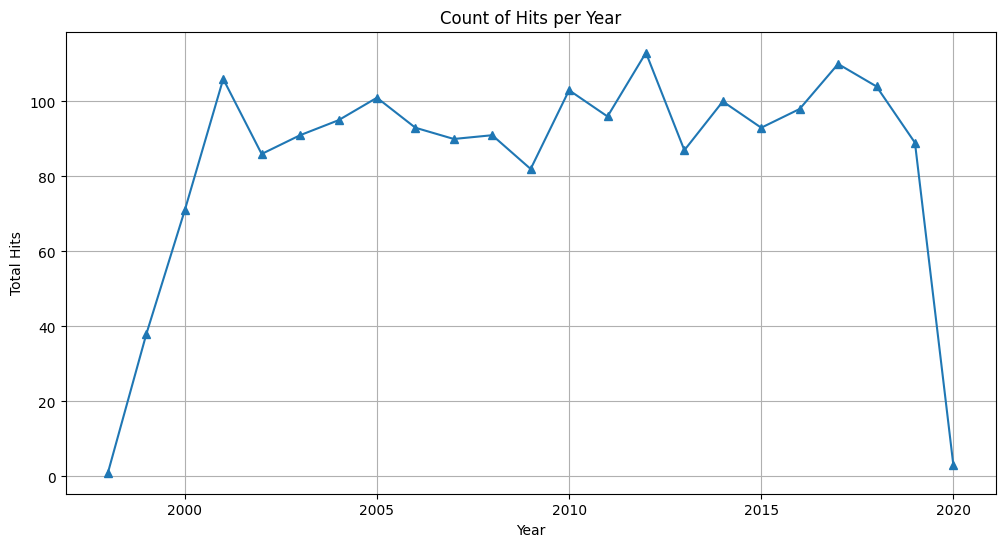

In [40]:
fig, ax = plt.subplots(figsize = (12, 6))
plt.plot(spotify_frequency_year['year'], spotify_frequency_year['song'], marker = '^')
plt.title('Count of Hits per Year')
plt.xlabel('Year')
plt.ylabel('Total Hits')
plt.grid()
plt.show()

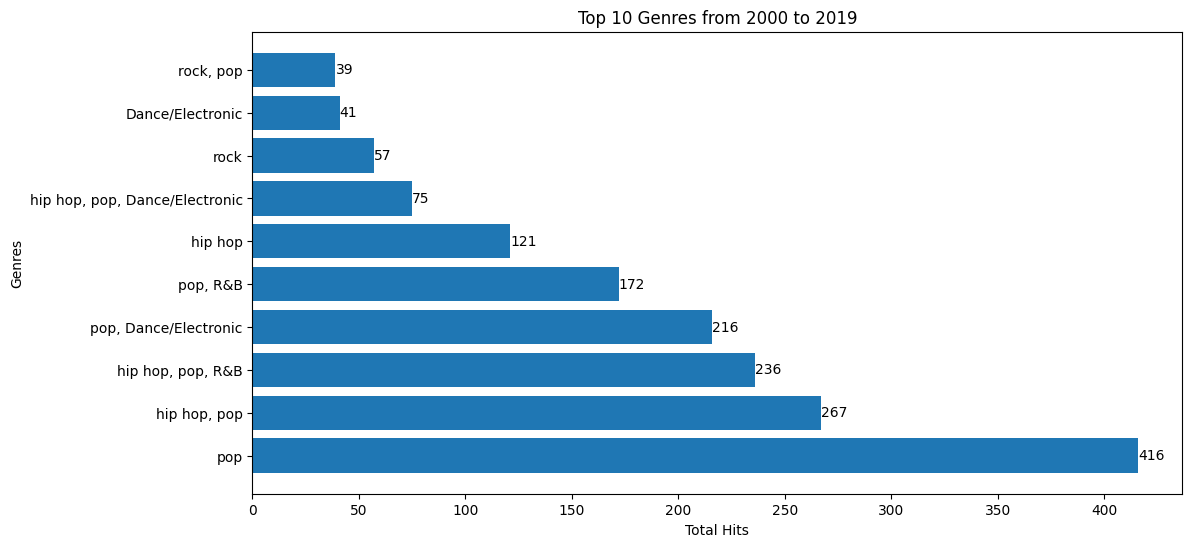

In [42]:
top10_spotify_frequency_genre = spotify_frequency_genre.iloc[:10]

fig, ax = plt.subplots(figsize = (12, 6))
t = ax.barh(top10_spotify_frequency_genre['genre'], top10_spotify_frequency_genre['song'])
plt.title('Top 10 Genres from 2000 to 2019')
plt.xlabel('Total Hits')
plt.ylabel('Genres')
plt.bar_label(t, label_type = 'edge')
plt.show()

**Most present genres per year**

In [12]:
spotify_frequency_first_genre_year = spotify_frequency.groupby(['year', 'genre']).agg({
    'song' : 'count'
  }).reset_index().sort_values('song', ascending = False)

spotify_frequency_first_genre_year = spotify_frequency_first_genre_year.groupby('year').first().sort_values('year', ascending = True)
spotify_frequency_first_genre_year

,genre,song
year,,
1998,"hip hop, pop, R&B",1
1999,pop,11
2000,pop,16
2001,pop,25
2002,"hip hop, pop, R&B",26
2003,"hip hop, pop",17
2004,"pop, R&B",15
2005,"hip hop, pop",20
2006,pop,24


# **Popularity Rankings**

In [13]:
spotify_popularity = spotify[['year', 'artist', 'song', 'genre', 'popularity']]
spotify_popularity['song_artist'] = spotify_popularity['artist'] + ' - ' + spotify_popularity['song']
spotify_popularity.drop(['song'], axis = 1, inplace = True)
spotify_popularity.head()

,year,artist,genre,popularity,song_artist
0,2000,Britney Spears,pop,77,Britney Spears - Oops!...I Did It Again
1,1999,blink-182,"rock, pop",79,blink-182 - All The Small Things
2,1999,Faith Hill,"pop, country",66,Faith Hill - Breathe
3,2000,Bon Jovi,"rock, metal",78,Bon Jovi - It's My Life
4,2000,*NSYNC,pop,65,*NSYNC - Bye Bye Bye


**Most popular song per year**

In [14]:
spotify_popularity_year = spotify_popularity[['year', 'song_artist', 'popularity']]
spotify_popularity_year.sort_values('popularity', ascending = False, inplace = True)
spotify_popularity_year.groupby('year').first().sort_values('year', ascending = True)

,song_artist,popularity
year,,
1998,Missy Elliott - Hot Boyz,49
1999,Dr. Dre - The Next Episode,82
2000,Eminem - The Real Slim Shady,86
2001,Jimmy Eat World - The Middle,78
2002,Eminem - Without Me,87
2003,Linkin Park - Numb,81
2004,Usher - Yeah! (feat. Lil Jon & Ludacris),81
2005,Gorillaz - Feel Good Inc.,82
2006,Nelly Furtado - Promiscuous,82


**Most popular song per genre**

In [15]:
spotify_popularity_genre = spotify_popularity[['genre', 'song_artist', 'popularity']]
spotify_popularity_genre.sort_values('popularity', ascending = False, inplace = True)
spotify_popularity_genre.groupby('genre').first().sort_values('popularity', ascending = False)

,song_artist,popularity
genre,,
"rock, pop",The Neighbourhood - Sweater Weather,89
pop,Tom Odell - Another Love,88
hip hop,Eminem - Without Me,87
"pop, Dance/Electronic",Billie Eilish - lovely (with Khalid),86
"pop, R&B, Dance/Electronic",WILLOW - Wait a Minute!,86
"pop, R&B",The Weeknd - The Hills,84
rock,Arctic Monkeys - Do I Wanna Know?,84
"hip hop, pop, R&B",Drake - One Dance,84
Dance/Electronic,Gesaffelstein - Lost in the Fire (feat. The We...,84


**Top 20 most popular artists from 2000 to 2019**

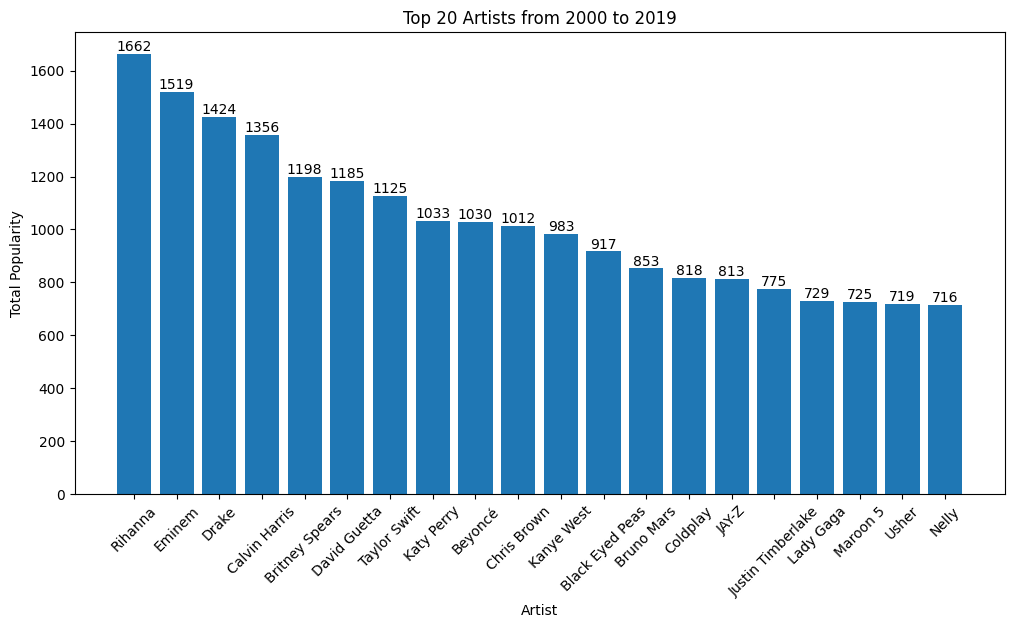

In [16]:
spotify_popularity_artist = spotify_popularity[['artist', 'song_artist', 'popularity']]
spotify_popularity_artist = spotify_popularity_artist.groupby('artist').agg({
    'popularity' : 'sum',
    'song_artist' : 'count'
  }).reset_index()

spotify_popularity_artist.sort_values('popularity', ascending = False, inplace = True)
spotify_popularity_artist = spotify_popularity_artist.groupby('artist').first().sort_values('popularity', ascending = False)

fig, ax = plt.subplots(figsize = (12, 6))
s = plt.bar(spotify_popularity_artist.index[:20], spotify_popularity_artist['popularity'][:20])
plt.title('Top 20 Artists from 2000 to 2019')
plt.xlabel('Artist')
plt.ylabel('Total Popularity')
plt.bar_label(s, label_type = 'edge')
plt.xticks(rotation = 45)
plt.show()

**Top 20 most popular songs from 2000 to 2019**

In [17]:
spotify_popularity_song = spotify_popularity[['year', 'song_artist', 'popularity']]
spotify_popularity_song.sort_values('popularity', ascending = False, inplace = True)
spotify_popularity_song.iloc[:20]

,year,song_artist,popularity
1322,2013,The Neighbourhood - Sweater Weather,89
1311,2013,Tom Odell - Another Love,88
201,2002,Eminem - Without Me,87
1613,2015,WILLOW - Wait a Minute!,86
1819,2018,Billie Eilish - lovely (with Khalid),86
6,2000,Eminem - The Real Slim Shady,86
1999,2019,Post Malone - Circles,85
1514,2014,Avicii - The Nights,85
1512,2015,The Neighbourhood - Daddy Issues,85
1709,2017,Ed Sheeran - Perfect,85


# **Duration**

In [18]:
spotify_duration = spotify[['song', 'artist', 'duration_ms']]
spotify_duration.head()

,song,artist,duration_ms
0,Oops!...I Did It Again,Britney Spears,3.52
1,All The Small Things,blink-182,2.78
2,Breathe,Faith Hill,4.18
3,It's My Life,Bon Jovi,3.74
4,Bye Bye Bye,*NSYNC,3.34


In [19]:
spotify_duration['duration_min'] = spotify_duration['duration_ms'].astype(int)
spotify_duration['duration_seg'] = spotify_duration['duration_ms'] - spotify_duration['duration_min']
spotify_duration['duration_seg'] = (spotify_duration['duration_seg'] * 60).round(2).astype(int)
spotify_duration['duration'] = spotify_duration['duration_min'].astype(str) + ':' + spotify_duration['duration_seg'].astype(str)

spotify_duration.drop(['duration_min', 'duration_seg'], axis = 1, inplace = True)
spotify_duration.sort_values('duration_ms', ascending = False, inplace = True)
spotify_duration['song_artist'] = spotify_duration['artist'] + ' - ' + spotify_duration['song']
spotify_duration.head()

,song,artist,duration_ms,duration,song_artist
1381,Mirrors,Justin Timberlake,8.07,8:4,Justin Timberlake - Mirrors
140,Another Chance,Roger Sanchez,7.55,7:33,Roger Sanchez - Another Chance
706,What Goes Around.../...Comes Around (Interlude),Justin Timberlake,7.48,7:28,Justin Timberlake - What Goes Around.../...Com...
760,LoveStoned / I Think She Knows (Interlude),Justin Timberlake,7.41,7:24,Justin Timberlake - LoveStoned / I Think She K...
242,Days Go By,Dirty Vegas,7.20,7:12,Dirty Vegas - Days Go By


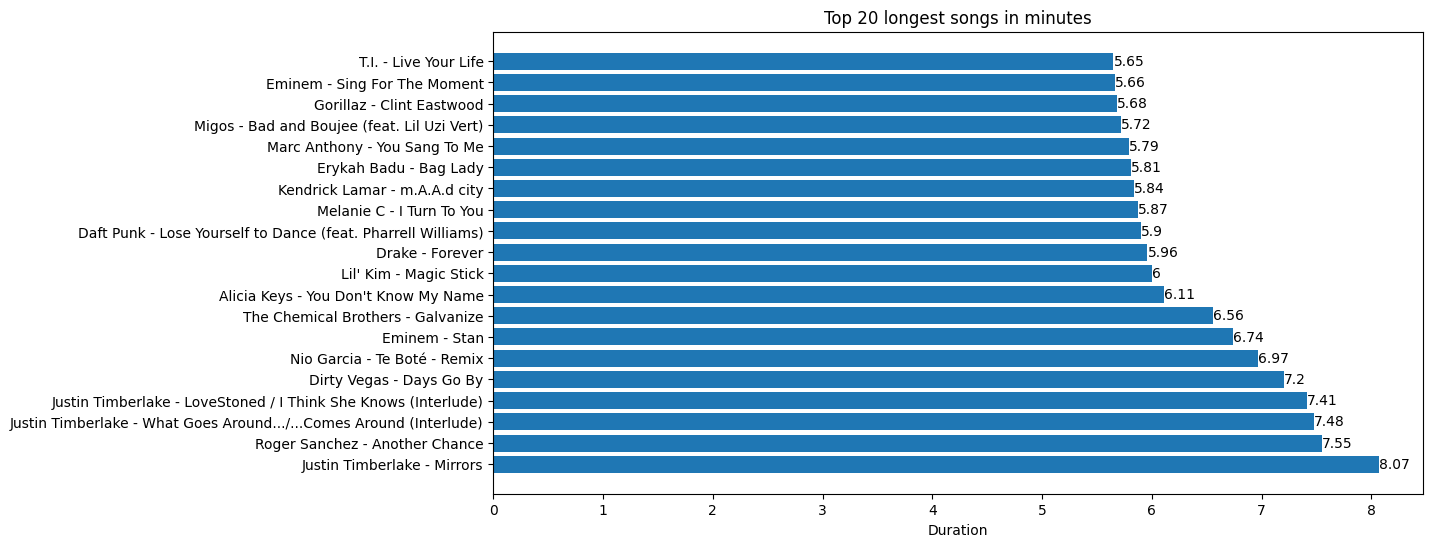

In [20]:
fig, ax = plt.subplots(figsize = (12, 6))
s = plt.barh(spotify_duration['song_artist'][:20], spotify_duration['duration_ms'][:20])
plt.title('Top 20 longest songs in minutes')
plt.xlabel('Duration')
plt.bar_label(s, label_type = 'edge')
plt.show()

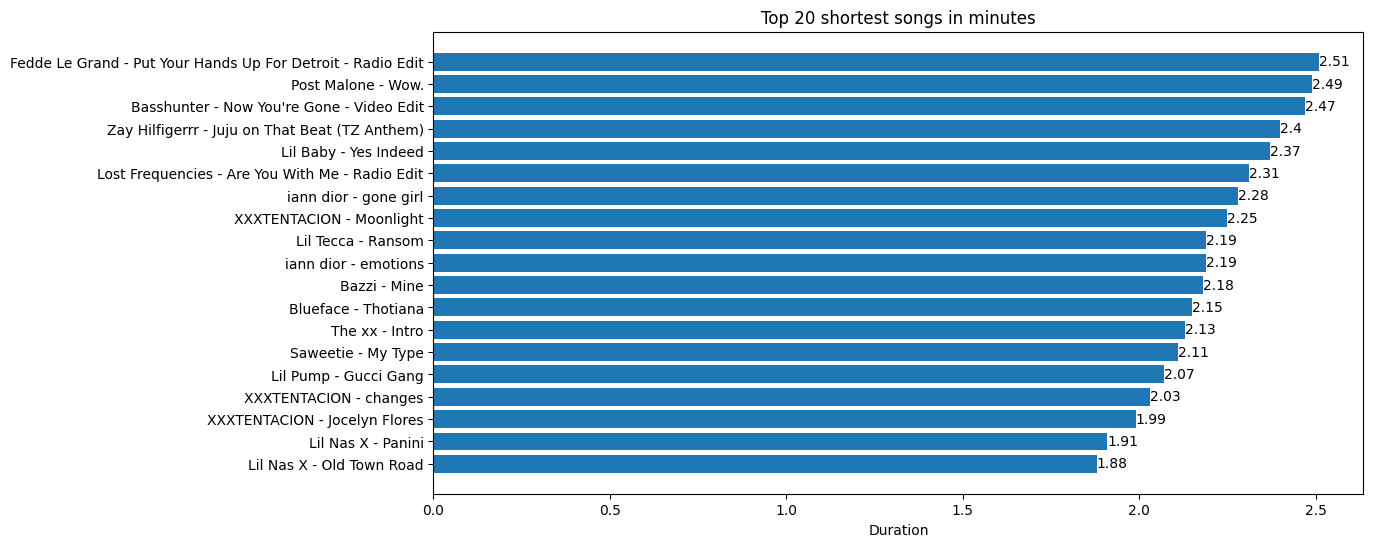

In [21]:
spotify_duration.sort_values('duration_ms', ascending = True, inplace = True)

fig, ax = plt.subplots(figsize = (12, 6))
s = plt.barh(spotify_duration['song_artist'][:19], spotify_duration['duration_ms'][:19])
plt.title('Top 20 shortest songs in minutes')
plt.xlabel('Duration')
plt.bar_label(s, label_type = 'edge')
plt.show()

# **Measurements and Comparisons**

In [22]:
comp_spotify = spotify[['year', 'genre', 'duration_ms', 'explicit', 'popularity']]
comp_spotify.head()

,year,genre,duration_ms,explicit,popularity
0,2000,pop,3.52,False,77
1,1999,"rock, pop",2.78,False,79
2,1999,"pop, country",4.18,False,66
3,2000,"rock, metal",3.74,False,78
4,2000,pop,3.34,False,65


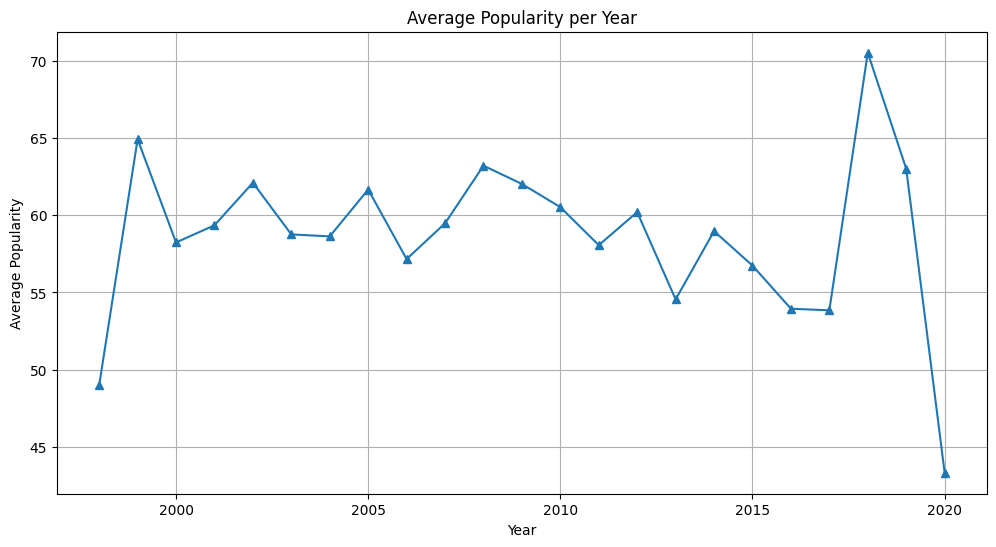

In [43]:
spotify_avg_year = comp_spotify.groupby('year').agg({
    'popularity' : 'mean'
  }).reset_index()

fig, ax = plt.subplots(figsize = (12, 6))
plt.plot(spotify_avg_year['year'], spotify_avg_year['popularity'], marker = '^')
plt.title('Average Popularity per Year')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid()

**Average of Popularity per Genre**

In [24]:
spotify_avg_genre = comp_spotify.groupby('genre').agg({
    'popularity' : 'mean'
  }).reset_index()

spotify_avg_genre.sort_values('popularity', ascending = False, inplace = True)
spotify_avg_genre

,genre,popularity
42,"pop, rock, Folk/Acoustic",79.000000
1,"Folk/Acoustic, pop",78.000000
57,"rock, pop, metal, Dance/Electronic",76.000000
27,"hip hop, rock, pop",75.000000
29,metal,72.000000
18,"hip hop, latin, Dance/Electronic",72.000000
13,easy listening,72.000000
47,"rock, Folk/Acoustic, pop",71.000000
53,"rock, metal",70.527778
5,"World/Traditional, Folk/Acoustic",69.000000


**Average of Duration per Genre**

In [25]:
spotify_avg_genre_duration = comp_spotify.groupby('genre').agg({
    'duration_ms' : 'mean'
  }).reset_index()

spotify_avg_genre_duration['duration_min'] = spotify_avg_genre_duration['duration_ms'].astype(int)
spotify_avg_genre_duration['duration_seg'] = spotify_avg_genre_duration['duration_ms'] - spotify_avg_genre_duration['duration_min']
spotify_avg_genre_duration['duration_seg'] = (spotify_avg_genre_duration['duration_seg'] * 60).round(2).astype(int)
spotify_avg_genre_duration['duration'] = spotify_avg_genre_duration['duration_min'].astype(str) + ':' + spotify_avg_genre_duration['duration_seg'].astype(str)
spotify_avg_genre_duration.drop(['duration_min', 'duration_seg'], axis = 1, inplace = True)

spotify_avg_genre_duration.sort_values('duration_ms', ascending = False, inplace = True)
spotify_avg_genre_duration

,genre,duration_ms,duration
13,easy listening,5.040000,5:2
2,"Folk/Acoustic, rock",4.640000,4:38
18,"hip hop, latin, Dance/Electronic",4.280000,4:16
24,"hip hop, pop, country",4.210000,4:12
35,"pop, R&B, easy listening",4.170000,4:10
43,"pop, rock, metal",4.161429,4:9
9,"World/Traditional, rock",4.155000,4:9
49,"rock, blues",4.120000,4:7
3,"Folk/Acoustic, rock, pop",4.090000,4:5
57,"rock, pop, metal, Dance/Electronic",4.070000,4:4


**Explicits vs No-explicits - Which most popular?**

In [26]:
comp_spotify.groupby('explicit').agg({
    'popularity' : 'mean'
  }).reset_index()

,explicit,popularity
0,False,59.004274
1,True,61.277467


**Count of Explicits ans No-explicits songs per year**

In [27]:
comp_spotify['explicit_label'] = comp_spotify['explicit'].apply(lambda x: 'Explicit' if x == True else 'No-explicit')
comp_spotify_explicit = comp_spotify.groupby(['year', 'explicit_label']).size().reset_index(name = 'count')
comp_spotify_explicit = comp_spotify_explicit.pivot_table(index = 'year', columns= 'explicit_label', values = 'count').fillna(0).astype(int)
comp_spotify_explicit.reset_index(inplace = True)

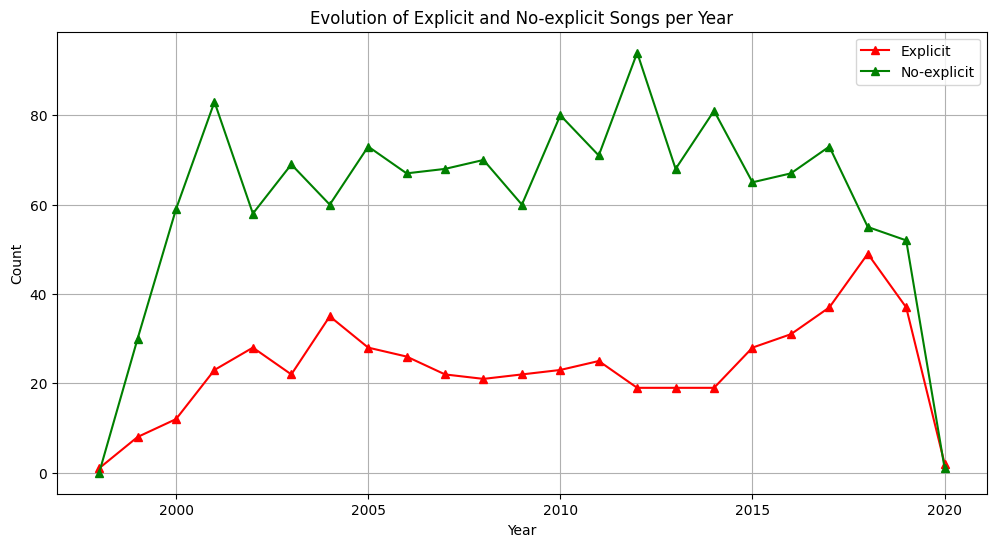

In [44]:
fig, ax = plt.subplots(figsize = (12, 6))
plt.plot(comp_spotify_explicit['year'], comp_spotify_explicit['Explicit'], marker = '^', label = 'Explicit', color = 'r')
plt.plot(comp_spotify_explicit['year'], comp_spotify_explicit['No-explicit'], marker = '^', label = 'No-explicit', color = 'g')
plt.title('Evolution of Explicit and No-explicit Songs per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()
plt.legend()
plt.show()

In [29]:
comp_spotify_explicit_genre = comp_spotify.groupby(['genre', 'explicit_label']).size().reset_index(name = 'count')
comp_spotify_explicit_genre = comp_spotify_explicit_genre.pivot_table(index = 'genre', columns= 'explicit_label', values = 'count').fillna(0).astype(int)
comp_spotify_explicit_genre.reset_index(inplace = True)
comp_spotify_explicit_genre

explicit_label,genre,Explicit,No-explicit
0,Dance/Electronic,7,34
1,"Folk/Acoustic, pop",0,2
2,"Folk/Acoustic, rock",0,1
3,"Folk/Acoustic, rock, pop",1,0
4,R&B,2,11
5,"World/Traditional, Folk/Acoustic",0,1
6,"World/Traditional, hip hop",1,1
7,"World/Traditional, pop",0,1
8,"World/Traditional, pop, Folk/Acoustic",0,2
9,"World/Traditional, rock",0,2


# **Correlations**

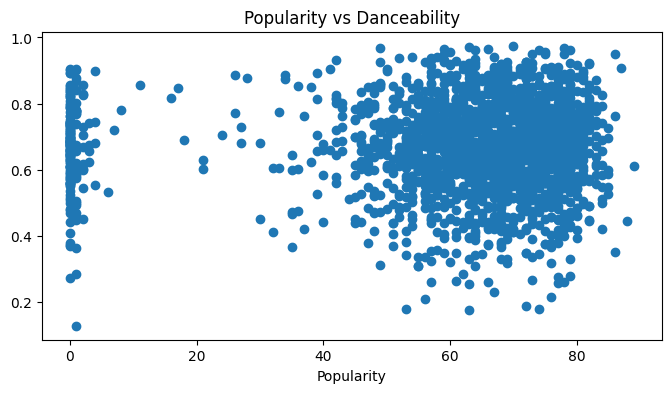

In [30]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(spotify['popularity'], spotify['danceability'])
plt.title('Popularity vs Danceability')
plt.xlabel('Popularity')
plt.show()

**Popularity × Danceability → Do danceable songs tend to be more popular?**

Yes, there is a tendency for danceable songs to achieve greater popularity, although this is not a hard and fast rule. The graph shows a higher concentration of popularity in tracks with a danceability above 0.6.

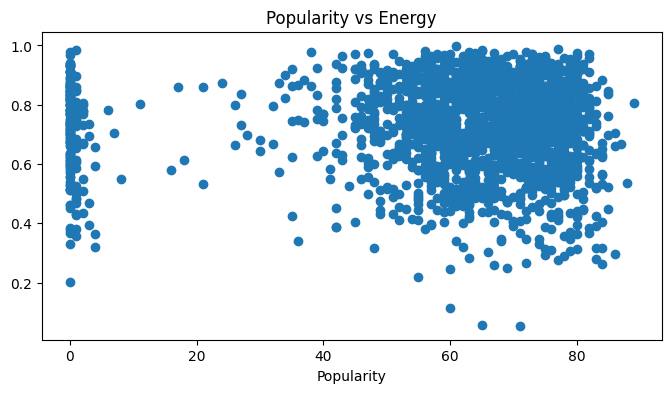

In [31]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(spotify['popularity'], spotify['energy'])
plt.title('Popularity vs Energy')
plt.xlabel('Popularity')
plt.show()

**Popularity × Energy → Do more intense songs have more success?**

There is a slight positive trend: songs with higher energy generally have higher popularity. However, there are also outliers with low energy and high popularity, indicating that energy is not the only relevant factor.

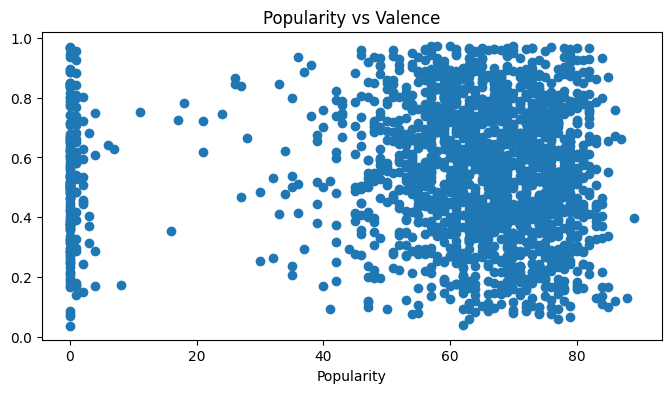

In [32]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(spotify['popularity'], spotify['valence'])
plt.title('Popularity vs Valence')
plt.xlabel('Popularity')
plt.show()

**Popularity × Valence → Does emotional tone affect popularity?**

The relationship is weak. Songs with different emotional tones (happy or sad) can be successful. The graph shows a low correlation between valence and popularity.

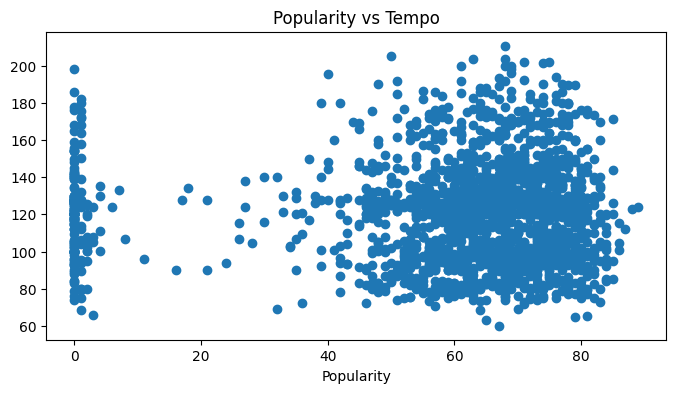

In [33]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(spotify['popularity'], spotify['tempo'])
plt.title('Popularity vs Tempo')
plt.xlabel('Popularity')
plt.show()

**Popularity × Tempo (bpm) → Does tempo influence success?**

Surprisingly, the graph shows a concentration of popularity in tracks with a more moderate or low BPM. Very fast songs seem to be less popular in general.

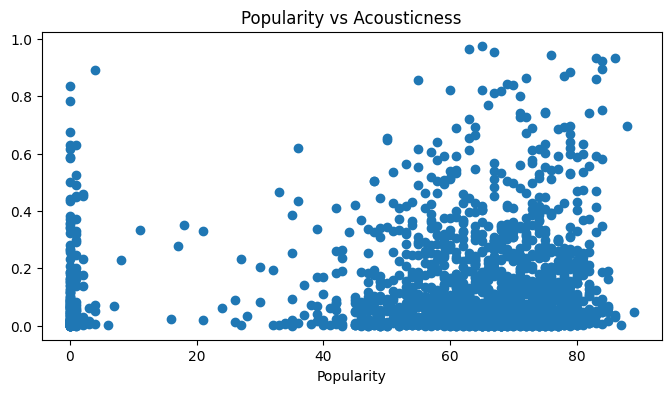

In [34]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(spotify['popularity'], spotify['acousticness'])
plt.title('Popularity vs Acousticness')
plt.xlabel('Popularity')
plt.show()

**Popularity × Acousticness → Are more acoustic songs less popular?**

Yes. Most popular songs are not acoustic. The graph shows that songs with high acousticness are less frequent among the most popular songs — with a few notable exceptions.

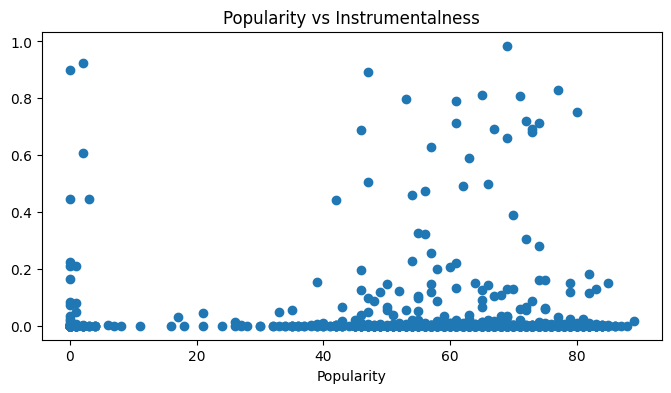

In [35]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(spotify['popularity'], spotify['instrumentalness'])
plt.title('Popularity vs Instrumentalness')
plt.xlabel('Popularity')
plt.show()

**Popularity × Instrumentalness → Are instrumental songs popular?**

The vast majority of popular songs have little or no instrumental characteristics. Instrumental songs are rarely popular — they are the exception, not the rule.

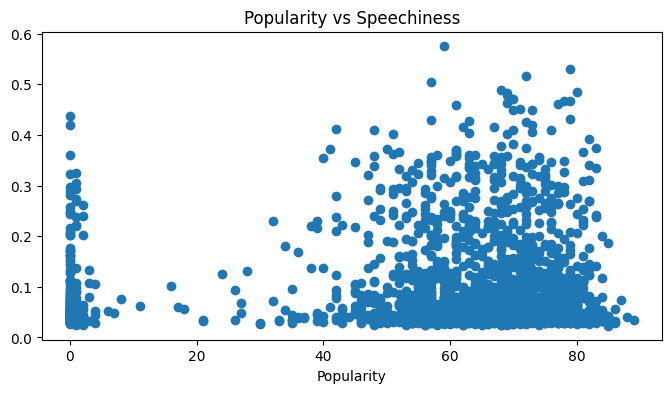

In [36]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(spotify['popularity'], spotify['speechiness'])
plt.title('Popularity vs Speechiness')
plt.xlabel('Popularity')
plt.show()

**Popularity × Speechiness → Are spoken word or rap songs successful?**

Most popular songs have low speech. However, there are areas with high speechiness and high popularity, suggesting that some rap or spoken word songs are also successful — although this is not the norm.

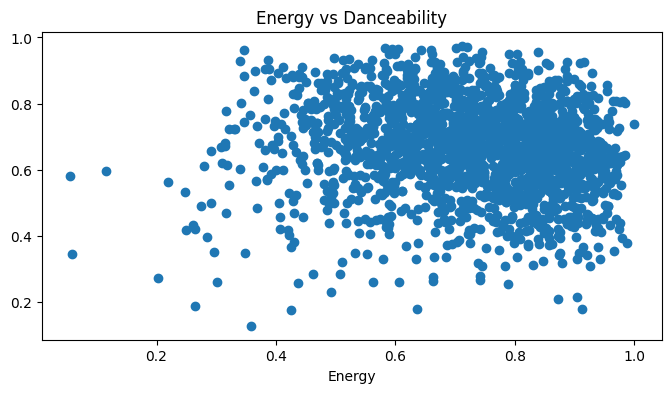

In [37]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(spotify['energy'], spotify['danceability'])
plt.title('Energy vs Danceability')
plt.xlabel('Energy')
plt.show()

**Energy × Danceability → Are danceable songs also intense?**

The correlation between energy and danceability is slightly positive — many songs with high energy are also danceable, which makes sense in genres like pop and electronica. However, the scatter in the graph shows that this relationship is not deterministic: there are danceable songs with low energy and vice versa. So the trend exists, but with important variations.

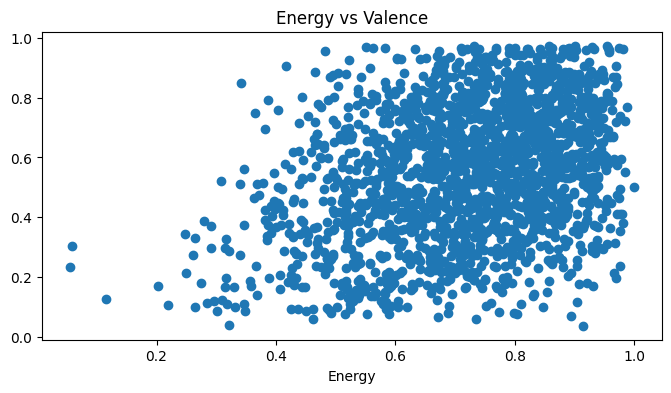

In [38]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(spotify['energy'], spotify['valence'])
plt.title('Energy vs Valence')
plt.xlabel('Energy')
plt.show()

**Energy × Valence → Are happy songs more energetic?**

The scatter plot shows a weak relationship between valence (positive emotional tone) and energy. This reinforces that happy songs are not always intense — for example, a soft, upbeat song can have high valence and low energy, like ballads or acoustic tracks. The correlation, if any, is very tenuous.

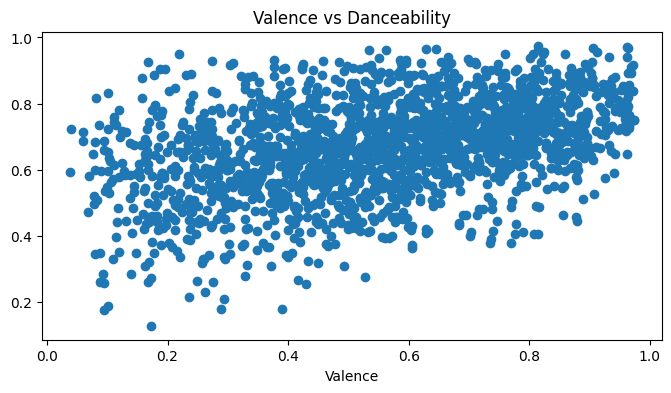

In [39]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(spotify['valence'], spotify['danceability'])
plt.title('Valence vs Danceability')
plt.xlabel('Valence')
plt.show()

**Valence × Danceability → Are happy songs more danceable?**

Here the scatter seems a bit more concentrated in the regions of high valence and danceability, which suggests a slight positive correlation. This indicates that happier songs are slightly more likely to also be danceable — although this relationship is not yet strong enough to say for sure. It is more of a suggestion than a rule.